
<img src="http://pydata.org/amsterdam2016/static/images/pydata-logo-amsterdam-2016.png">

<img style="float: right; width: 150px; margin-right: 170px" src="https://pbs.twimg.com/profile_images/458970549146759168/eCDy8x2E.jpeg">
# Building a Face Recognition System with OpenCV in the blink of an Eye

This notebook was created for the tutorial during the PyData Meeting:
- Author: <font color='red'>Rodrigo Agundez from Qualogy Solutions</font>
- Place: Papaverweg 265, Amsterdam
- Date: March 12, 2016
- Time: 16:15
- Room 2

The goal of this tutorial is to build a simple face recognition system with the use of the opencv library. This tutorial is separated in three parts:
- Basic manipulation techniques of images and video using OpenCV.
- Building our data set of images.
- Training the classification model provided by OpenCV.
- Recognize never seen images by the model.
- Recognize faces from a live video feed.
- Try to trick the face recognition to classify other types of objects.

### A bit about OpenCV
OpenCV is an open source computer vision and machine learning software library.
The library includes a comprehensive set of both classic and state-of-the-art computer vision and machine learning algorithms. These algorithms can be used to:
<div style="float: left; width: 40%; margin-top: 16px; margin-bottom: 16px">
<ul style="align: left; list-style-type:square">
  <li>Detect Faces</li>
  <li>Recognize Faces</li>
  <li>Identify Objects</li>
  <li>Classify human actions in videos</li>
  <li>Track camera movement</li>
  <li>Track moving objects</li>
</ul>
</div>
<div style="float: right; width: 60%; margin-top: 16px; margin-bottom: 16px">
<ul style="align: left; list-style-type:square">
  <li>Extract 3D models of objects</li>
  <li>Produce 3D point clouds from stereo cameras</li>
  <li>Stitch images together to produce a high resolution image of an entire scene</li>
  <li>Find similar images from an image database</li>
  <li>Remove red eyes from images taken using flash</li>
  <li>Follow eye movements</li>
</ul>
</div>

It has C++, C, Python, Java and MATLAB interfaces and supports Windows, Linux, Android and Mac OS. 

### Requiered Packages for this tutorial
<ul style="list-style-type:square">
  <li>OpenCV (cv2)</li>
  <li>Numpy</li>
  <li>matpotlib</li>
</ul>


<h2 align="center" style='color: white; background-color: red'>Let's Get Started!</h2> 

## Import Modules

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
%matplotlib inline

In [3]:
%%timeit
cv2.imread('/home/rodrigo/Pictures/Selection_006.png',1)

100 loops, best of 3: 6.15 ms per loop


<h2 align="center" style='color: red'>Let's Take  Picture</h2>

In [5]:
feed = cv2.VideoCapture(0)
ret, frame = feed.read()
feed.release()

### View picture in external resizable window

In [45]:
# Open a new thread to manage the external cv2 interaction
cv2.startWindowThread()
cv2.namedWindow('PyData Tutorial', cv2.WINDOW_NORMAL)
cv2.imshow('PyData Tutorial', frame)
# Press any key to close external window
cv2.waitKey()
cv2.destroyAllWindows()
print 'Pixel Size of the picture: ' + str(frame.shape)

Pixel Size of the picture: (480, 640, 3)


### View picture in external fix window

In [46]:
cv2.namedWindow('PyData Tutorial', cv2.WINDOW_AUTOSIZE)
cv2.imshow('PyData Tutorial', frame)
# Press any key to close external window
cv2.waitKey()
cv2.destroyAllWindows()
print 'Pixel Size of the picture: ' + str(frame.shape)

Pixel Size of the picture: (480, 640, 3)


### View picture inside the notepad: Frame is a numpy array!

<type 'numpy.ndarray'>


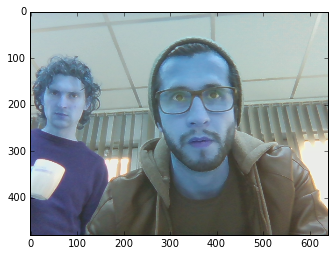

In [3]:
print type(frame)
plt.imshow(frame)
plt.show()

### Looks ugly, what happened?
Well, OpenCV takes the pictures in a blue-green-red (BGR) format, I know, very annoying. 

### From BGR to RGB format

(-0.5, 639.5, 479.5, -0.5)

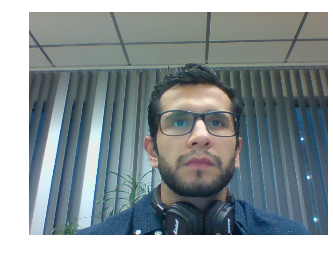

In [83]:
frame_RGB = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(frame_RGB)
# Let's take those ugly ticks off
plt.axis("off")

### Save the picture: frame or frame_RGB?
Since we will be using OpenCV methods we should better stick with frame in the format BGR. For demonstration purposes we will save frame_RGB.

Pictures Saved
Pictures Read


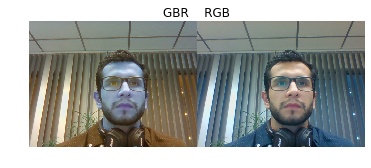

In [92]:
try:
    cv2.imwrite('picture_GBR.jpg',frame)
    cv2.imwrite('picture_RGB.jpg',frame_RGB)
    print "Pictures Saved"
except:
    print "Picture not saved"
# read picture and display
try:
    picture_GBR = cv2.imread('picture_GBR.jpg', 1)
    picture_RGB = cv2.imread('picture_RGB.jpg', 1)
    print 'Pictures Read'
    picture = np.concatenate((picture_GBR, picture_RGB), axis=1)
    plt.imshow(picture)
    plt.title('GBR    RGB')
    plt.axis("off")
except:
    print "Unable to read all the pictures"

### Read the picture from file

In [42]:
try:
    pic = cv2.imread('picture_01.jpg', 1)
    pic_gray = cv2.imread('picture_01.jpg', 0)
except:
    print "Unable to read all the pictures"

<h2 align="center" style='color: red'>Let's Take  Video</h2>

In [13]:
# Open connection to camera
feed = cv2.VideoCapture(0)

### Show live feed as images in external window

In [14]:
# Open a new thread to manage the external cv2 interaction
cv2.namedWindow('PyData Tutorial', cv2.WINDOW_NORMAL)
while True:
    ret, frame = feed.read()
    cv2.imshow('PyData Tutorial', frame)
    # code 27 is ESC key
    if cv2.waitKey(20) & 0xFF == 27:
        print 'Video Killed but live feed object still exists'
        break
cv2.destroyAllWindows()

Video Killed but live feed object still exists


### Show live feed as images in notebook
Since the notebook does ot run as a tty device type getch() returns an error so we cannot catch a press key with this method. Instead we will use an the keyboard interrupt exception to strop the video.

In [23]:
# module to allow interactive window inside notebook
from IPython.display import clear_output
import time

try:
    while True:
        ret, frame = feed.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
        plt.axis("off")
        plt.show()
        clear_output(wait=True)
        #time.sleep(.1)
except KeyboardInterrupt:
    print 'Video Killed but live feed object still exists'

Video Killed but live feed object still exists


In [24]:
feed.release()